In [27]:
import pandas as pd
import networkx as nx
import itertools
import csv
import pydot
from IPython.display import Image

In [28]:
def networkx2dot(G):
    strict = nx.number_of_selfloops(G) == 0 and not G.is_multigraph()
    GDOT = pydot.Dot("OKRMAP", graph_type="digraph", strict=strict) #rankdir="LR"
    GDOT.graph_defaults = G.graph.get("graph", {})
    GDOT.set_node_defaults(shape='box', style="filled", color="black", fillcolor="white", fontname='helvetica')
    GDOT.set_edge_defaults(fontname='helvetica')
    
    for n, nodedata in G.nodes(data=True):
        if n !=None:
            node_lst = list(nodedata.values())
            node_dict = str(node_lst[0])
            node_label = str(n)+'\n'+node_dict
            dotnode = pydot.Node(n, label = node_label)
            GDOT.add_node(dotnode)

    for u, y, edgedata in G.edges(data=True):
        if y !=None:
            edge_lst = list(edgedata.values())
            edge_label = str(edge_lst[0])
            dotedge = pydot.Edge(str(u), str(y), label = edge_label)
            GDOT.add_edge(dotedge)
    return GDOT

In [29]:
df = pd.read_csv(r"D:\Code\TFBOKRMAP\okrlist\rdtest111c.csv", usecols = ['Number','Title', 'statement']) 
df2 = df.drop(['statement'], axis='columns')
df3 = df.drop(['Number', 'Title'], axis='columns')
df.head()

,Number,Title,statement
0,1000,Feel boring.,boolean
1,1100,Play,boolean
2,1110,Play Cards,boolean
3,1120,Play Basketball,boolean
4,1130,Play Video Game,boolean


In [30]:
import networkx as nx

G = nx.DiGraph() #rankdir="LR"
#Setting Nodes and Node Attributes 
G.add_nodes_from(df['Number'])
print(G.nodes)

node_label = df2.set_index('Number').to_dict('index')
print(node_label)
nx.set_node_attributes(G, node_label)

print(G.nodes(data=True))
G.nodes[1000]["Title"]

[1000, 1100, 1110, 1120, 1130, 1131, 2000, 2100, 2110, 2120, 2130]
{1000: {'Title': 'Feel boring.'}, 1100: {'Title': 'Play'}, 1110: {'Title': 'Play Cards'}, 1120: {'Title': 'Play Basketball'}, 1130: {'Title': 'Play Video Game'}, 1131: {'Title': 'Open Steam'}, 2000: {'Title': 'Feel Hungry'}, 2100: {'Title': 'Eat'}, 2110: {'Title': 'McDonalds'}, 2120: {'Title': 'Nightmarket'}, 2130: {'Title': 'Dirt'}}
[(1000, {'Title': 'Feel boring.'}), (1100, {'Title': 'Play'}), (1110, {'Title': 'Play Cards'}), (1120, {'Title': 'Play Basketball'}), (1130, {'Title': 'Play Video Game'}), (1131, {'Title': 'Open Steam'}), (2000, {'Title': 'Feel Hungry'}), (2100, {'Title': 'Eat'}), (2110, {'Title': 'McDonalds'}), (2120, {'Title': 'Nightmarket'}), (2130, {'Title': 'Dirt'})]


'Feel boring.'

In [21]:
#Setting Edges and Edge Attributes
#Build Edge List
#import pprint
#edge_list=[]
#for i in range(1000,5901):
#  a=i//1000
#  b=(i%1000)//100
#  c=(i%100)//10
#  d=i%10
#  if b!=0:
#    if c!=0:
#      edge_list.append(i)
#    else:
#      if d==0:
#        edge_list.append(i)
#  else:
#    if c==0 and d==0:
#      edge_list.append(i)
#pprint.pprint(edge_list, depth=1, width=10000)
#這段好像沒有用.....87

In [31]:
#Build Edge List2

#讀取參照的edge結構
with open('number_logic.csv', newline='') as f:
    reader = csv.reader(f)
    number_logic = [tuple(map(int, row)) for row in reader]
#print(number_logic)

edge_list=[] #把df裡面的節點抓成list
for i in df['Number']:
    edge_list.append(i)
#print(edge_list)

edge_raw = [] #把df裡面的節點組合成edge tuple的list
for i in itertools.combinations(edge_list, 2):
      edge_raw.append(i)
#print(edge_raw)

edge1 = [x for x in edge_raw if x in number_logic] #比對edge_raw跟number_logic然後挑選集合部分做出新list
edge_label = df3.to_dict('records')
#print(edge_label)
for i in edge_label:
    edge2 = [list(tup)+[i] for tup in edge1] #把Statement作為tuple的第三個常數丟給edge
edge3 = [tuple(l) for l in edge2] #把上一步list裡面的元素轉回tuple...麻煩

print(edge3)
G.add_edges_from(edge3)

print(G.edges(data=True))

[(1000, 1100, {'statement': 'boolean'}), (1100, 1110, {'statement': 'boolean'}), (1100, 1120, {'statement': 'boolean'}), (1100, 1130, {'statement': 'boolean'}), (1130, 1131, {'statement': 'boolean'}), (2000, 2100, {'statement': 'boolean'}), (2100, 2110, {'statement': 'boolean'}), (2100, 2120, {'statement': 'boolean'}), (2100, 2130, {'statement': 'boolean'})]
[(1000, 1100, {'statement': 'boolean'}), (1100, 1110, {'statement': 'boolean'}), (1100, 1120, {'statement': 'boolean'}), (1100, 1130, {'statement': 'boolean'}), (1130, 1131, {'statement': 'boolean'}), (2000, 2100, {'statement': 'boolean'}), (2100, 2110, {'statement': 'boolean'}), (2100, 2120, {'statement': 'boolean'}), (2100, 2130, {'statement': 'boolean'})]


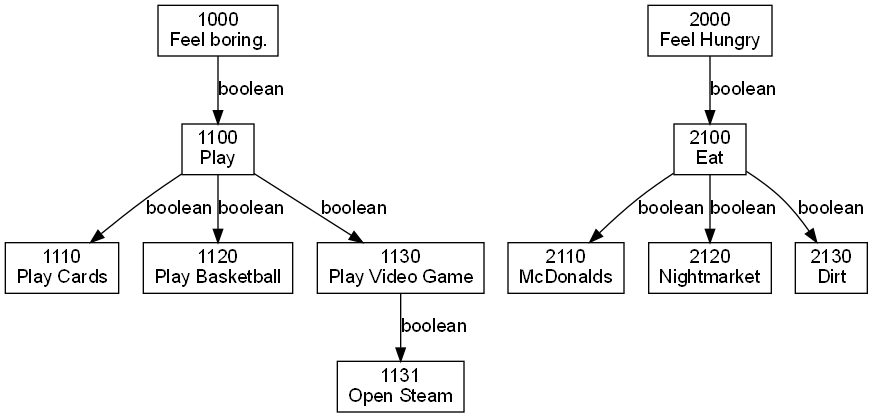

In [32]:
#使用Graphviz繪圖
GDOT = networkx2dot(G)
GDOT.write_png('tmp.png')
Image('tmp.png')
